# <CENTER> <b>   SKillCraftTechnology Data Science TASK-3

## Step 1: Load and Inspect the Data

First, let's read your dataset and inspect its structure.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Load the dataset
file_path = r"C:\Users\Lenovo\Downloads\bank.csv"
df = pd.read_csv(file_path, sep=";")  

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (4521, 17)

First 5 rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Missing Values:
 age          0
job          0
marital      0
educati

## Step 2: Data Preprocessing
Now, we'll:

-Convert categorical variables into numerical format using Label Encoding.

-Separate features (X) and target (y).

-Check data types to ensure everything is numerical for the model.

In [8]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:\n", cat_cols)

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Define Features (X) and Target Variable (y)
X = df.drop(columns=["y"])  # Features (All columns except target)
y = df["y"]  # Target (y column)

# Verify the transformation
print("\nUpdated Dataset (First 5 rows):")
print(df.head())

# Check data types after encoding
print("\nData Types:\n", df.dtypes)


Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Updated Dataset (First 5 rows):
   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8    

### Step 3: Split Data into Training & Testing Sets
Now, we’ll divide the dataset into:

-80% training data → for training the model

-20% testing data → for evaluating performance

In [9]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the datasets
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (3616, 16) (3616,)
Testing Data Shape: (905, 16) (905,)


This ensures we have a balanced split for model training and testing.

### Step 4: Train the Decision Tree Classifier
Now, we will train a Decision Tree Classifier using Scikit-learn.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


What happens here?

We create a Decision Tree Classifier using gini impurity.

We set max_depth=5 to prevent overfitting.

We train the model using fit(X_train, y_train).

### Step 5: Evaluate the Model
Now, let's check how well our Decision Tree Classifier performs using:

1.Accuracy Score

2.Classification Report (Precision, Recall, F1-score)

3.Confusion Matrix

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Model Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       801
           1       0.55      0.33      0.41       104

    accuracy                           0.89       905
   macro avg       0.73      0.65      0.68       905
weighted avg       0.87      0.89      0.88       905


Confusion Matrix:
 [[773  28]
 [ 70  34]]


🔹 Explanation
Accuracy Score → Measures overall correctness.

Classification Report → Shows Precision, Recall, and F1-score for each class.

Confusion Matrix → Displays actual vs. predicted values to analyze performance.

### Step 6: Visualize the Decision Tree
Now, let's plot the Decision Tree structure to understand how it makes decisions.

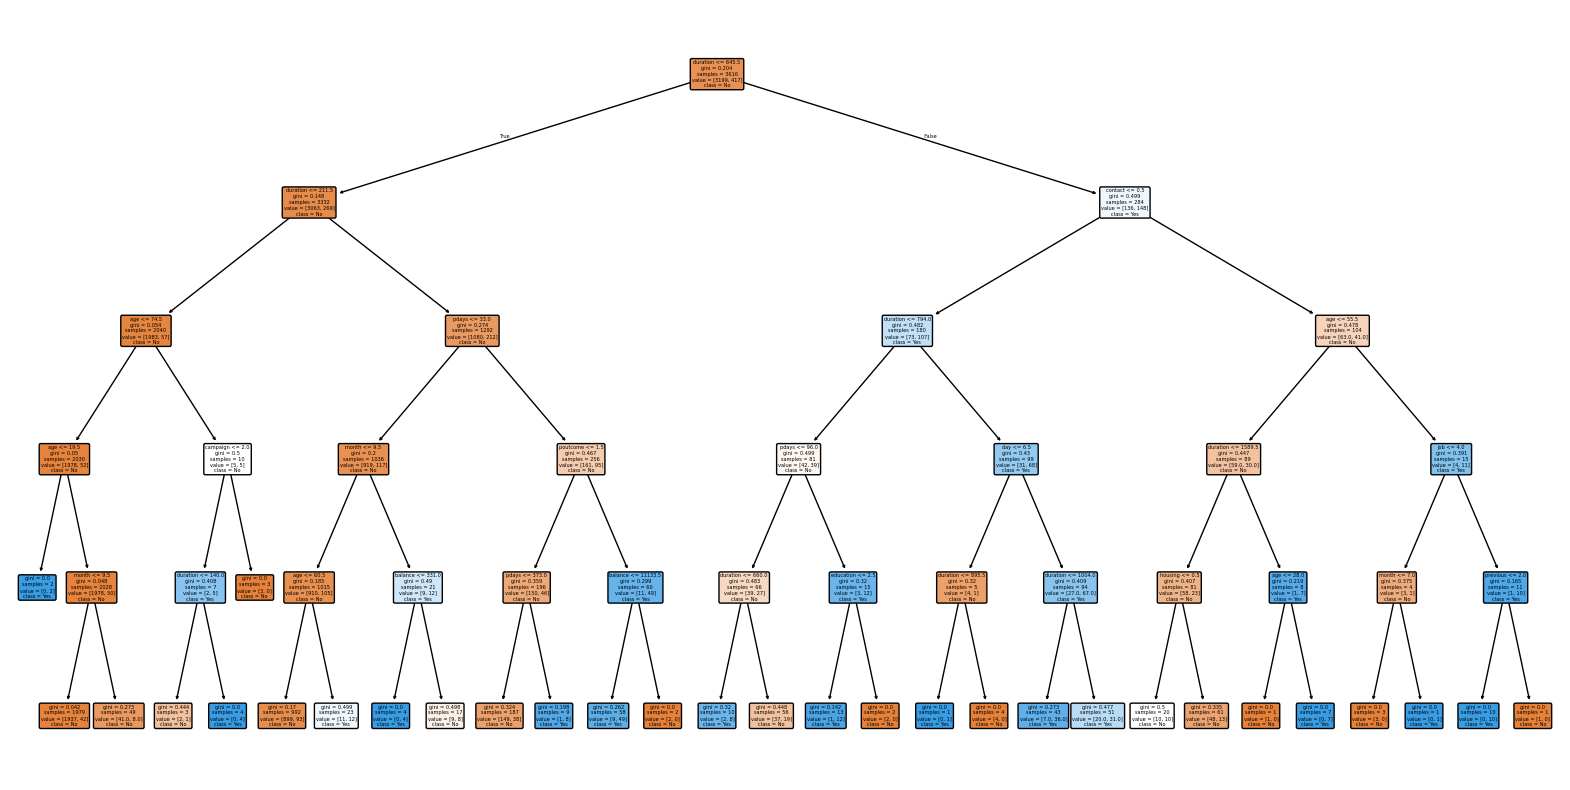

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set plot size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)

# Show the plot
plt.show()


 Explanation
The decision tree diagram shows how data is split at each node.

Feature names help understand which variables influence predictions.

Class labels ("No" & "Yes") represent the two possible outcomes.

### Step 7: Improve Model Performance (Optional but Recommended)
Now that we have built the Decision Tree, we can optimize its performance using Hyperparameter Tuning with GridSearchCV.

This will help us find the best combination of parameters such as:

-max_depth → Controls tree depth (avoids overfitting)

-min_samples_split → Minimum samples needed to split a node

-criterion → "gini" vs. "entropy" (for impurity calculation)

#### Perform Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Evaluate improved model
y_pred_best = best_dt_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Model Accuracy: {accuracy_best:.2f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Improved Model Accuracy: 0.89


#### Compare Performance
This will show:
✅ The best Decision Tree settings
✅ The accuracy after tuning

### Step 8: Save & Deploy the Model
Now that we have optimized our Decision Tree Classifier, we can save it for future use and deployment.